In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators: 

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions
    
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html 

In [2]:
heart_disease = pd.read_csv("../ztm-ml/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# heart_disease.isna().sum()

In [4]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2
)

model = RandomForestClassifier(n_estimators=200)
model.fit(x_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 4.1. Using the `score()` method

In [5]:
model.score(x_train, y_train)

1.0

In [6]:
model.score(x_test, y_test)

0.8688524590163934

In [7]:
from sklearn.datasets import fetch_california_housing

house_data = fetch_california_housing()
house_data

{'data': array([[   8.3252,   41.    ,    6.9841, ...,    2.5556,   37.88  ,
         -122.23  ],
        [   8.3014,   21.    ,    6.2381, ...,    2.1098,   37.86  ,
         -122.22  ],
        [   7.2574,   52.    ,    8.2881, ...,    2.8023,   37.85  ,
         -122.24  ],
        ...,
        [   1.7   ,   17.    ,    5.2055, ...,    2.3256,   39.43  ,
         -121.22  ],
        [   1.8672,   18.    ,    5.3295, ...,    2.1232,   39.43  ,
         -121.32  ],
        [   2.3886,   16.    ,    5.2547, ...,    2.617 ,   39.37  ,
         -121.24  ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instan

In [8]:
house_df = pd.DataFrame(house_data["data"], columns=house_data["feature_names"])
house_df["target"] = house_data["target"]
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = house_df.drop("target", axis=1)
y = house_df["target"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2
)

model = RandomForestRegressor(n_estimators=50)
model.fit(x_train, y_train)

,n_estimators,50
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
model.score(x_train, y_train)

0.9724639427824666

In [11]:
model.score(x_test, y_test)

0.8040980559742771

In [12]:
y_pred = model.predict(x_test)

In [13]:
# calculating the R^2 score manually
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
r2

np.float64(0.8040980559742771)

### 4.2 Evaluating a model using the `scoring` parameter

In [14]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2
)

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
model.score(x_test, y_test)

0.8524590163934426

In [16]:
# Create stratified k-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [17]:
cross_val_score(model, x, y, cv=cv, n_jobs=5)

array([0.8689, 0.8361, 0.7377, 0.8   , 0.8167])

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
np.random.seed(42)
model_single_score = model.score(x_test, y_test)

model_cross_val_score = cross_val_score(model, x, y, cv=cv, n_jobs=5)

print(f"Single score: {model_single_score: .4f}")
print(f"Cross-validated scores: {model_cross_val_score}")
print(f"Average cross-validated score: {np.mean(model_cross_val_score): .4f}")

Single score:  0.8361
Cross-validated scores: [0.8525 0.8361 0.7541 0.8167 0.8167]
Average cross-validated score:  0.8152


In [20]:
np.random.seed(42)

model_single_score = model.score(x_test, y_test)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

model_cross_val_score = cross_val_score(model, x, y, cv=cv, n_jobs=5)
print(f"Single score: {model_single_score: .4f}")
print(f"Cross-validated scores: {model_cross_val_score}")
print(f"Average cross-validated score: {np.mean(model_cross_val_score): .4f}")

Single score:  0.8361
Cross-validated scores: [0.8525 0.8033 0.8033 0.7333 0.8333]
Average cross-validated score:  0.8051


### 4.2.1 Classification model evaluation metrics

Four of the main evaluation metrics/methods you'll come across for classification models are:

1. [Accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy)
2. [Area under ROC curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) (receiver operating characteristic curve)
3. [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
4. [Classification report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

Let's have a look at each of these. We'll bring down the classification code from above to go through some examples.

Note: The RandomForestClassifier model `score` function by default uses accuracy as its metric. Keep in mind that different models may use different default metrics. For example, regression models tend to use R^2 as their default metric. Always check the documentation for the model you're using to see what metric its `score` function uses by default.

In [21]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

KFold(n_splits=5, shuffle=True, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
# Default score metric for RandomForestClassifier is accuracy
cross_val_scores = cross_val_score(model, x, y, cv=cv, n_jobs=5)

In [22]:
np.mean(cross_val_scores)

np.float64(0.8051366120218578)

In [23]:
print(f"Heart disease cross-validated accuracy: {np.mean(cross_val_scores): .4f}")

Heart disease cross-validated accuracy:  0.8051


#### Area Under Receiver Operating Characteristic (ROC) Curve
If this one sounds like a mouthful, its because reading the full name is.

It's usually referred to as AUC for Area Under Curve and the curve they're talking about is the Receiver Operating Characteristic or ROC for short.

So if hear someone talking about AUC or ROC, they're probably talking about what follows.

ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr).

For clarity:
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

Now we know this, let's see one. Scikit-Learn lets you calculate the information required for a ROC curve using the [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) function.

In [24]:
# Create x_train, x_test, y_train, y_test splits with train_test_split()

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)

In [26]:
y_probs_postive = y_prob[:, 1]
y_probs_postive

array([0.05, 0.62, 0.55, 0.14, 0.79, 0.84, 0.64, 0.05, 0.04, 0.47, 0.81,
       0.36, 0.93, 0.13, 0.96, 0.97, 0.99, 0.08, 0.02, 0.06, 0.46, 0.1 ,
       0.65, 0.77, 0.65, 0.66, 0.79, 0.7 , 0.1 , 0.88, 0.09, 0.09, 0.03,
       0.33, 0.53, 0.19, 0.59, 0.78, 0.59, 0.87, 0.81, 0.74, 0.84, 0.66,
       0.71, 0.24, 0.55, 0.99, 0.16, 0.06, 0.35, 0.19, 0.85, 0.66, 0.24,
       0.1 , 0.41, 0.94, 0.14, 0.  , 0.19])

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_postive)

In [28]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and
    true positive rate (tpr) of a model.
    """
    
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

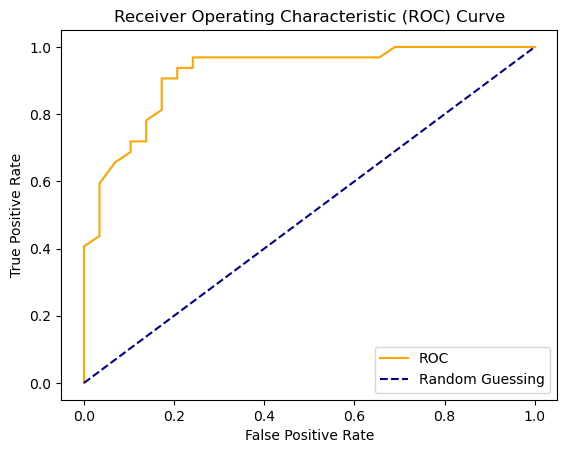

In [29]:
plot_roc_curve(fpr, tpr)

In [30]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_probs_postive)
roc_auc

0.9202586206896551

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred, labels=model.classes_)

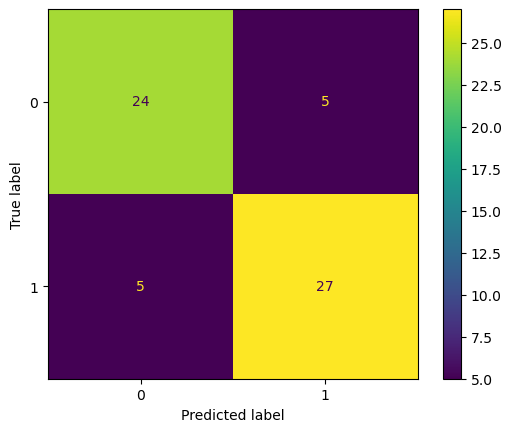

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

#### Creating a confusion matrix using Scikit-Learn

Scikit-Learn has multiple different implementations of plotting confusion matrices:

1. [`sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator) - this takes a fitted estimator (like our `clf` model), features (`X`) and labels (`y`), it then uses the trained estimator to make predictions on `X` and compares the predictions to `y` by displaying a confusion matrix.
2. [`sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.

> **Note:** Both of these methods/classes require Scikit-Learn 1.0+. To check your version of Scikit-Learn run:
```python
import sklearn
sklearn.__version__
```
> If you don't have 1.0+, you can upgrade at: https://scikit-learn.org/stable/install.html

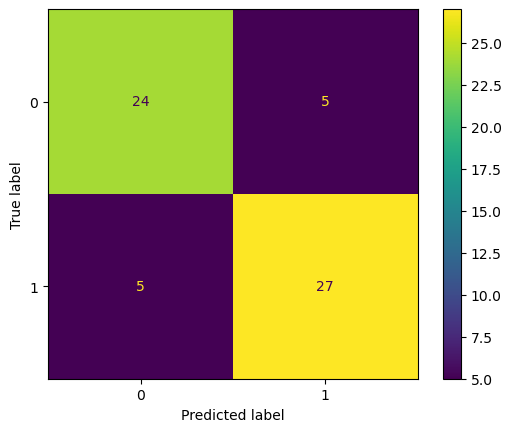

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False);

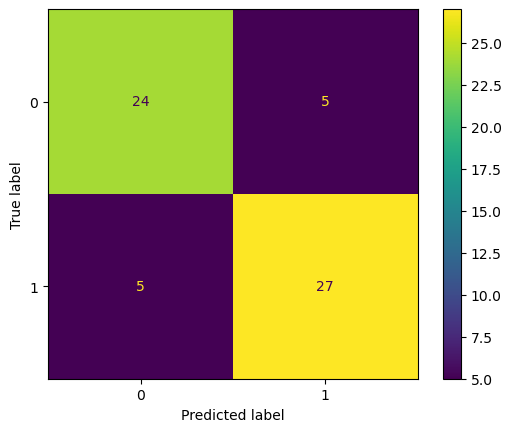

In [34]:
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test);
plt.grid(False);

In [37]:
from sklearn.metrics import classification_report

model_report = classification_report(y_test, y_pred)
print(model_report)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



To summarize classification metrics:
    
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.